In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
len(df)


442

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
predictions[0:5]

array([147.79446399, 123.08330119, 151.86307125, 167.68469644,
        86.57313148])

Text(0, 0.5, 'Predictions')

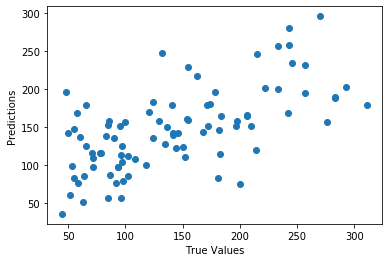

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [9]:
import numpy as np
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 54.90386921531147
Train RMSE: 53.18546449671054


# Cross Validation

In [10]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([5, 6, 7, 8]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf.get_n_splits(X))

2


In [11]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [12]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    print( "smse", np.sqrt(mean_squared_error(y_test,predictions)))

TRAIN: [2 3] TEST: [0 1]
smse 2.0
TRAIN: [0 1] TEST: [2 3]
smse 2.0


In [13]:
print(X_train)
print(X_test)

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


In [14]:
y_train, y_test

(array([5, 6]), array([7, 8]))

In [15]:
print(X_train)
print(y_train)

[[1 2]
 [3 4]]
[5 6]


In [16]:
print(X_test)
print(y_test)

[[1 2]
 [3 4]]
[7 8]


In [17]:
predictions = lm.predict(X_test)
predictions

array([5., 6.])

In [18]:
np.sqrt(mean_squared_error(y_test,predictions))

2.0

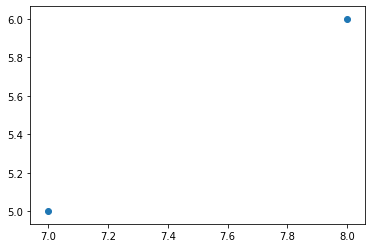

In [19]:
plt.scatter(y_test,predictions)

### LOOCV

TRAIN: [1 2 3] TEST: [0]
[3.]
smse 2.0
[[3 4]
 [1 2]
 [3 4]] [2 3 4]
[[1 2]] [1]
TRAIN: [0 2 3] TEST: [1]
[4.]
smse 2.0
[[1 2]
 [1 2]
 [3 4]] [1 3 4]
[[3 4]] [2]
TRAIN: [0 1 3] TEST: [2]
[1.]
smse 2.0
[[1 2]
 [3 4]
 [3 4]] [1 2 4]
[[1 2]] [3]
TRAIN: [0 1 2] TEST: [3]
[2.]
smse 2.0
[[1 2]
 [3 4]
 [1 2]] [1 2 3]
[[3 4]] [4]


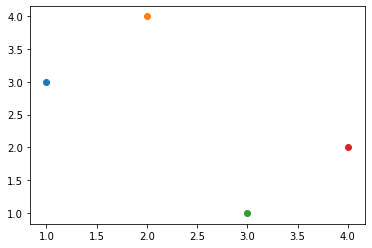

In [20]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    print(predictions)
    print( "smse", np.sqrt(mean_squared_error(y_test,predictions)))
    plt.scatter(y_test,predictions)
    print(X_train,y_train)
    print(X_test,y_test)

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

In [ ]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [ ]:
print(np.sqrt(mean_squared_error(y,predictions)))

# tasks 

##### Find out cross validation results without using cross_val_predict

In [24]:
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
df

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [25]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10) # Define the split - into 10 folds 

for train_index, test_index in kf.split(df):
    #print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    
    print(np.sqrt(mean_squared_error(y_test,predictions)))
    #plt.scatter(y_test,predictions)
    

50.33734309001734
53.57954564391661
59.26823355982129
52.52834596063676
59.62950564185627
53.85517999336665
60.79705484505579
47.77321004446417
64.21012366749521
42.06761291739352


In [26]:
type(y_test)

numpy.ndarray

In [27]:
type(X_test)

pandas.core.frame.DataFrame

##### Implement cross validation without using sklearn at all

In [28]:
# your code herecolumns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
df.head()


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [29]:
len(df),len(y)

(442, 442)

In [30]:
X1=df.iloc[:148]
y1=y[:148]
X2=df.iloc[148:295]
y2=y[148:295]
X3=df.iloc[295:]
y3=y[295:]


In [31]:
lm.fit(df.iloc[:295], y[:295])
predict1=lm.predict(X3)
print(np.sqrt(mean_squared_error(y3,predict1)))

52.858090378672095


In [32]:
lm.fit(df.iloc[148:], y[148:])
predict2=lm.predict(X1)
print(np.sqrt(mean_squared_error(y1,predict2)))

55.083865829917514


In [33]:
lm.fit(df.iloc[:295], y[:295])
predict1=lm.predict(X3)
print(np.sqrt(mean_squared_error(y3,predict1)))

52.858090378672095


In [41]:
X4=df.drop(df.index[148:295])  
y4=np.delete(y, np.s_[148:295]) 
lm.fit(X4,y4)
predict3=lm.predict(X2)
print(np.sqrt(mean_squared_error(y2,predict3)))

57.037036802163776


In [39]:
len(y4)

295

In [319]:
len(X4)

295

# Feature Scaling

In [42]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 


y = data['Value']
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [43]:
data1 = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [44]:
data1

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0
...,...,...,...,...
17902,19,47,65,22.0
17903,19,47,63,21.0
17904,16,47,67,33.0
17905,17,47,66,34.0


In [45]:
trainX,testX,trainY,testY=train_test_split(data1,y,random_state=40,test_size=0.2)
len(trainX),len(trainY),len(testX),len(testY) 

(14325, 14325, 3582, 3582)

In [46]:
regr = linear_model.LinearRegression()

In [47]:
regr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
predy=regr.predict(testX)

In [49]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(testY, predy)))

Root mean squared error: 3739061.66


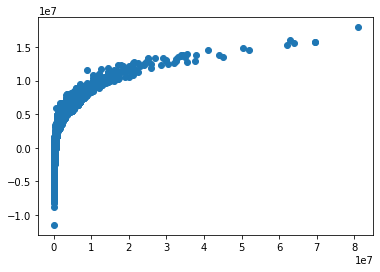

In [50]:
plt.scatter(testY,predy)

#### MinMaxScaler

In [51]:
import pandas as pd
import numpy as np
# Initialise the Scaler and Fit
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

In [52]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.421875
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.140625
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.390625
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.453125
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.312500
...,...,...,...,...,...,...,...,...,...,...
393,0.150000,0.0,0.169421,0.281690,0.348039,0.293825,0.415584,0.141044,0.332264,0.406250
394,0.650000,0.0,0.417355,0.690141,0.495098,0.194223,0.116883,0.564175,0.986452,0.515625
395,0.216667,0.0,0.351240,0.338028,0.426471,0.298805,0.402597,0.282087,0.608066,0.281250
396,0.100000,1.0,0.227273,0.366197,0.225490,0.195219,0.428571,0.141044,0.114226,0.359375


In [53]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test)).head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.550000,0.0,0.404959,0.323944,0.598039,0.470120,0.350649,0.282087,0.659091,0.234375
1,0.766667,1.0,0.433884,0.661972,0.509804,0.405378,0.311688,0.282087,0.637811,0.562500
2,0.383333,0.0,0.520661,0.830986,0.387255,0.254980,0.610390,0.141044,0.352618,0.453125
3,0.566667,0.0,0.173554,0.225352,0.328431,0.196215,0.623377,0.000000,0.321627,0.640625
4,1.000000,1.0,0.219008,0.366197,0.436275,0.432271,0.142857,0.564175,0.545499,0.656250


### Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [56]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.798882,1.046297,1.326498,0.465381,-0.916421,-0.715441,-0.913809,-0.050893,0.408586,-0.354792
1,-0.035646,-0.955752,-1.085684,-0.562540,-0.160854,-0.383489,1.582336,-0.823995,-1.423490,-1.922791
2,1.785142,1.046297,0.958927,-0.122003,-0.945481,-0.702163,-0.679796,-0.050893,0.054691,-0.529014
3,-1.856434,-0.955752,-0.235677,-0.782809,0.275050,0.552617,-0.757800,0.722210,0.466382,-0.180569
4,0.116087,-0.955752,-0.764059,0.465381,0.100689,0.353446,0.178254,-0.050893,-0.669003,-0.964569
...,...,...,...,...,...,...,...,...,...,...
393,-1.552969,-0.955752,-0.970818,-0.929655,-0.596758,-0.469796,0.334263,-0.823995,-0.831330,-0.441903
394,0.723016,-0.955752,0.407571,1.199610,0.275050,-1.133701,-1.459841,1.495313,2.696076,0.167875
395,-1.249504,-0.955752,0.040001,-0.635963,-0.131793,-0.436601,0.256259,-0.050893,0.655806,-1.138791
396,-1.780568,1.046297,-0.649194,-0.489117,-1.323265,-1.127062,0.412268,-0.823995,-2.006999,-0.703236


In [65]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test)).head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.267819,-0.955752,0.338652,-0.709386,0.885316,0.705316,-0.055760,-0.050893,0.930933,-1.400125
1,1.254079,1.046297,0.499464,1.052764,0.362231,0.273777,-0.289773,-0.050893,0.816192,0.429208
2,-0.490843,-0.955752,0.981900,1.933839,-0.364276,-0.728719,1.504331,-0.823995,-0.721580,-0.180569
3,0.343685,-0.955752,-0.947845,-1.223346,-0.712999,-1.120423,1.582336,-1.597098,-0.888688,0.864764
4,2.316206,1.046297,-0.695140,-0.489117,-0.073673,0.453032,-1.303832,1.495313,0.318443,0.951875


# tasks

In [66]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 


y = data['Value']
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [67]:
data1

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0
...,...,...,...,...
17902,19,47,65,22.0
17903,19,47,63,21.0
17904,16,47,67,33.0
17905,17,47,66,34.0


In [90]:
trainX,testX,trainY,testY=train_test_split(data1,y,random_state=40,test_size=0.2)
len(trainX),len(trainY),len(testX),len(testY)

(14325, 14325, 3582, 3582)

In [91]:
#Using MinMaxScaler

In [92]:
norm = MinMaxScaler().fit(trainX)
pd.DataFrame(columns = trainX.columns, data = norm.transform(trainX))

,Age,Overall,Potential,Jersey Number
0,0.137931,0.500000,0.613636,0.061224
1,0.206897,0.250000,0.340909,0.387755
2,0.310345,0.291667,0.340909,0.163265
3,0.448276,0.770833,0.772727,0.000000
4,0.103448,0.270833,0.545455,0.285714
...,...,...,...,...
14320,0.172414,0.375000,0.545455,0.275510
14321,0.172414,0.229167,0.386364,0.122449
14322,0.275862,0.291667,0.272727,0.214286
14323,0.137931,0.291667,0.454545,0.244898


In [93]:
pd.DataFrame(columns = testX.columns, data = norm.transform(testX)).head()

,Age,Overall,Potential,Jersey Number
0,0.310345,0.520833,0.545455,0.336735
1,0.275862,0.312500,0.386364,0.030612
2,0.655172,0.395833,0.340909,0.295918
3,0.517241,0.500000,0.454545,0.214286
4,0.310345,0.500000,0.545455,0.000000


In [94]:
regr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
ypred_afterminmaxscaler=regr.predict(testX)

In [96]:
print('Root mean squared error: %.2f'% np.sqrt(mean_squared_error(testY, ypred_afterminmaxscaler)))

Root mean squared error: 3739061.66


In [97]:
## Using StandartScaler

In [98]:
norm = StandardScaler().fit(trainX)
pd.DataFrame(columns = trainX.columns, data = norm.transform(trainX))

,Age,Overall,Potential,Jersey Number
0,-1.089459,0.539543,0.918687,-0.791440
1,-0.661250,-1.182404,-1.031597,1.212803
2,-0.018937,-0.895412,-1.031597,-0.165114
3,0.837481,2.404986,2.056352,-1.167235
4,-1.303564,-1.038908,0.431116,0.586477
...,...,...,...,...
14320,-0.875355,-0.321430,0.431116,0.523844
14321,-0.875355,-1.325899,-0.706549,-0.415644
14322,-0.233041,-0.895412,-1.519168,0.148049
14323,-1.089459,-0.895412,-0.218979,0.335947


In [99]:
pd.DataFrame(columns = testX.columns, data = norm.transform(testX))

,Age,Overall,Potential,Jersey Number
0,-0.018937,0.683039,0.431116,0.899640
1,-0.233041,-0.751917,-0.706549,-0.979337
2,2.122108,-0.177935,-1.031597,0.649110
3,1.265690,0.539543,-0.218979,0.148049
4,-0.018937,0.539543,0.431116,-1.167235
...,...,...,...,...
3577,-0.233041,0.252552,-0.056455,-0.290379
3578,-0.018937,-0.464926,-0.706549,-1.167235
3579,-0.233041,0.970030,0.918687,4.281799
3580,0.623377,0.396048,-0.381502,-1.041970


In [100]:
regr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
ypred_afterStandardScaler=regr.predict(testX)

In [102]:
print('Root mean squared error: %.2f'% np.sqrt(mean_squared_error(testY, ypred_afterStandardScaler)))

Root mean squared error: 3739061.66


### before Scaler 
Root mean squared error: 3739061.66
                                       
### after MInMaxScaler
3739061.66
### after StandardScaler
3739061.66


# One Hot Encoding

In [57]:
data = pd.read_csv('regression.csv')
data

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,CM,22.0,2019,5'9,134lbs
17903,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,ST,21.0,2020,6'3,170lbs
17904,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,ST,33.0,2021,5'8,148lbs
17905,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,RW,34.0,2019,5'10,154lbs


In [58]:
data1 = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [59]:
data1

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0
...,...,...,...,...
17902,19,47,65,22.0
17903,19,47,63,21.0
17904,16,47,67,33.0
17905,17,47,66,34.0


In [60]:
data2=pd.get_dummies(data[['Age','Club','Overall','Potential','Jersey Number']])

In [61]:
data2

,Age,Overall,Potential,Jersey Number,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,94,94,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,94,94,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,92,93,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,91,93,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,91,92,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,47,65,22.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,47,63,21.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,47,67,33.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,47,66,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
target1=data['Value']
target1

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
17902        60000.0
17903        60000.0
17904        60000.0
17905        60000.0
17906        60000.0
Name: Value, Length: 17907, dtype: float64

# tasks

###### try applying this scalers to any column(s) and check the regression results

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(data2,target1, test_size=0.2, random_state=40)
ytest

3943     2500000.0
14261     290000.0
9920      130000.0
4815     1200000.0
4928     1600000.0
           ...    
7211      950000.0
12531     350000.0
3055     5000000.0
6475     1100000.0
6818      975000.0
Name: Value, Length: 3582, dtype: float64

In [71]:
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
ypred=regr.predict(xtest)

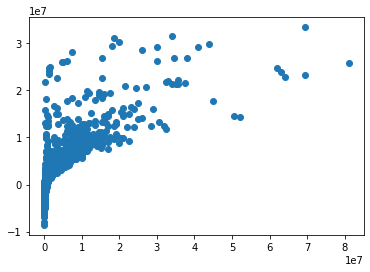

In [73]:
plt.scatter(ytest,ypred)

In [74]:
print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(ytest, ypred)))

Root mean squared error: 3371003.68


## before 'Club' added 
Root mean squared error: 3739061.66
## after 
 Root mean squared error:3371003.68